<a href="https://colab.research.google.com/github/adiban17/PyTorch-Tutorial/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Welcome to classification with PyTorch")

Welcome to classification with PyTorch


# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another thing (there can be multiple other things as options).

In [2]:
import torch
torch.cuda.is_available()

False

## 1. Make Classification data and get it ready

In [3]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [6]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


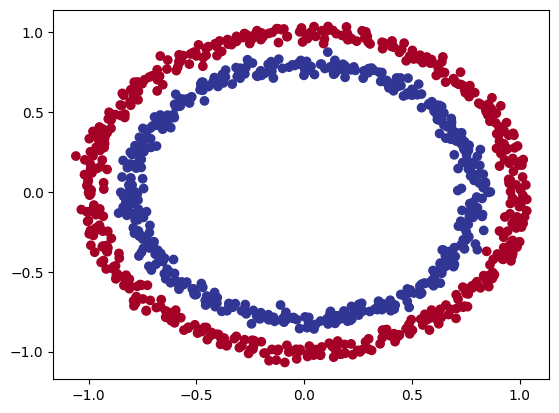

In [7]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note**: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Value for one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


In [10]:
import torch
torch.__version__

'2.9.0+cpu'

In [11]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [12]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [13]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [14]:
# Splitting our data into train, test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
len(X_train), len(X_test)

(800, 200)

In [16]:
n_samples

1000

## 2. Building a model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will on an accelerator(GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
# import Torch and NN
import torch
from torch import nn

# Setting device agonistic code
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

device

'cpu'

Now we've setup device agonistic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`

In [18]:
# 1. Construct a model that sunclasses `nn.Module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales it to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and downscales it to 1 feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x-> layer_1 -> layer_2 -> output


# 4. Instantiate an instance of our model class and send it to the taregt device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cpu'

In [20]:
next(model_0.parameters()).device

device(type='cpu')

In [21]:
# Let's replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [22]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0117, -0.1242],
                      [-0.0677,  0.0376],
                      [-0.1060,  0.0942],
                      [ 0.6412,  0.2389],
                      [ 0.3624, -0.1070]])),
             ('0.bias', tensor([ 0.0412, -0.2867, -0.1571, -0.0507,  0.3623])),
             ('1.weight',
              tensor([[-0.1870, -0.1582,  0.1150, -0.1065, -0.3397]])),
             ('1.bias', tensor([-0.2037]))])

In [24]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predicitons:{len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape:{X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predicitons:200, Shape:torch.Size([200, 1])
Length of test samples: 200, Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.2020],
        [-0.2673],
        [-0.1770],
        [-0.2084],
        [-0.4093],
        [-0.4473],
        [-0.4473],
        [-0.4900],
        [-0.1672],
        [-0.2743]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer
Which loss function or optimizer should you use ?

Again...this is problem specific.

For example, for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want to use binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how **wrong** your models predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`
* For different optimizers use - `torch.optim`

In [25]:
# Setup the loss function
# loss_fn = nn.BCELOSS()  # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCE loss
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLOgitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [26]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model
To train our model, we're going to need to build a training loop:
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
Our model outputs are going to be **raw logits**.

We can convert these **logits** into **prediction probailities** by passing them to some kind of activation function (eg: sigmoid for binary and softmax for multiclass classification).

Then we can convert our model's predictionn probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [27]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2020],
        [-0.2673],
        [-0.1770],
        [-0.2084],
        [-0.4093]])

In [28]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [29]:
# Use the sigmoid activation function on our model logits to turn them into prediction probailities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4497],
        [0.4336],
        [0.4559],
        [0.4481],
        [0.3991]])

For our prediction probability values, we need to perform range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [30]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [32]:
device

'cpu'

In [33]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [34]:
torch.manual_seed(seed=42)
torch.cuda.manual_seed(seed=42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building training and evvaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,  # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test.squeeze())
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits.squeeze(),
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc} | Test loss:{test_loss} | Test acc:{test_acc}")


Epoch:0 | Loss:0.7067529559135437 | Acc:50.0 | Test loss:0.704197108745575 | Test acc:10000.0
Epoch:10 | Loss:0.7003429532051086 | Acc:50.0 | Test loss:0.6985191106796265 | Test acc:10000.0
Epoch:20 | Loss:0.6971718668937683 | Acc:44.125 | Test loss:0.6958038806915283 | Test acc:10000.0
Epoch:30 | Loss:0.6955519914627075 | Acc:44.625 | Test loss:0.6945043206214905 | Test acc:10000.0
Epoch:40 | Loss:0.6946913003921509 | Acc:48.25 | Test loss:0.693892240524292 | Test acc:10000.0
Epoch:50 | Loss:0.6942096948623657 | Acc:48.625 | Test loss:0.693617582321167 | Test acc:10000.0
Epoch:60 | Loss:0.6939215660095215 | Acc:48.875 | Test loss:0.693510115146637 | Test acc:10000.0
Epoch:70 | Loss:0.693735659122467 | Acc:50.0 | Test loss:0.6934859752655029 | Test acc:10000.0
Epoch:80 | Loss:0.6936059594154358 | Acc:50.24999999999999 | Test loss:0.6935034990310669 | Test acc:10000.0
Epoch:90 | Loss:0.6935089826583862 | Acc:50.24999999999999 | Test loss:0.6935416460037231 | Test acc:10000.0


In [35]:
test_logits.shape, y_test.shape

(torch.Size([200, 1]), torch.Size([200]))

In [36]:
circles.label.value_counts()

,count
label,
1,500
0,500


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual !

In other words, "Visualize, visualize, visualize"

TO do so, we're going to import a function called `plot_decision_boundary`

In [39]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_function").is_file():
  print("helper_function.py already exists, skipping download")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

Download helper_function.py


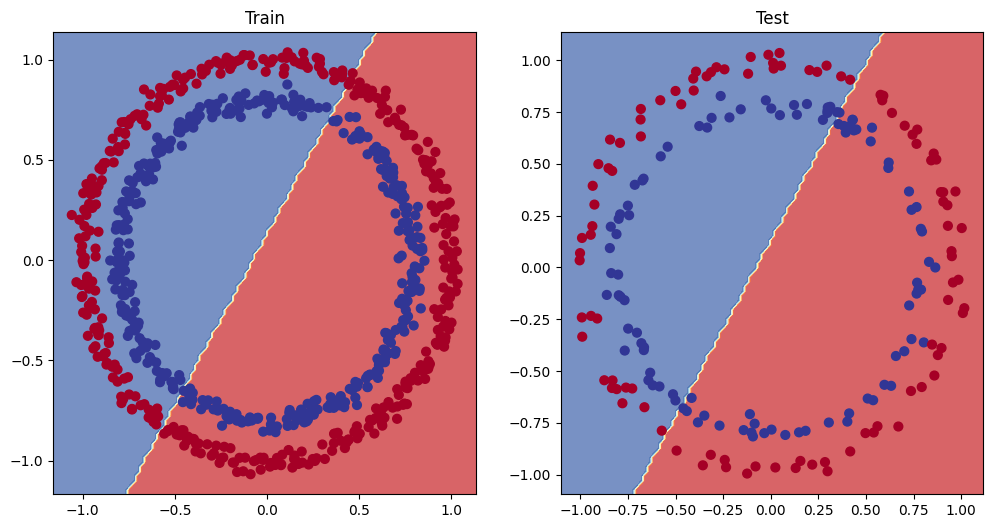

In [41]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred to as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5->10
* Increase the number of layers: 2-> 3
* Increase the number of epochs: 100 -> 1000

In [42]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0149, -0.1261],
                      [-0.0975,  0.0354],
                      [-0.0933,  0.0950],
                      [ 0.6313,  0.2383],
                      [ 0.3236, -0.1095]])),
             ('0.bias', tensor([ 0.0042, -0.3249, -0.1379, -0.0676,  0.3039])),
             ('1.weight',
              tensor([[-0.1839, -0.2307,  0.0722, -0.0241, -0.2247]])),
             ('1.bias', tensor([-0.0030]))])

In [44]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)


  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_3(x)))  # this way of writing operations gives us little speedups

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [46]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0149, -0.1261],
                      [-0.0975,  0.0354],
                      [-0.0933,  0.0950],
                      [ 0.6313,  0.2383],
                      [ 0.3236, -0.1095]])),
             ('0.bias', tensor([ 0.0042, -0.3249, -0.1379, -0.0676,  0.3039])),
             ('1.weight',
              tensor([[-0.1839, -0.2307,  0.0722, -0.0241, -0.2247]])),
             ('1.bias', tensor([-0.0030]))])

In [47]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336]])),
             ('layer_1.bias',
              tensor([ 0.8692,  0.1872,  0.7388,  0.1354,  0.4822, -0.1412,  0.7709,  0.1478,
                      -0.4668,  0.2549])),
             ('layer_2.weight',
              tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
                        0.0298, -0.3123],
                      [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0

In [48]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [52]:
# Write a training and evaluation loop for model_1
torch.manual_seed(23)
torch.cuda.manual_seed(23)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))   # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  loss.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate Loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch:{epoch} | Loss:{loss} | Acc:{acc} | Test Loss:{test_loss} | Test Acc:{test_acc}")



RuntimeError: mat1 and mat2 shapes cannot be multiplied (800x2 and 10x1)